# Streamlining workflows with pipelines

1-Obtaining the Breast Cancer Wisconsin dataset

In [1]:
import pandas as pd
df = pd.read_csv(
 'https://archive.ics.uci.edu/ml/'
 'machine-learning-databases'
 '/breast-cancer-wisconsin/wdbc.data',
 header=None)

2-Next, we will assign the 30 features to a NumPy array, X. Using
a LabelEncoder object, we will transform the class labels from their
original string representation ('M' and 'B') into integers:

In [2]:
from sklearn.preprocessing import LabelEncoder

X=df.loc[:, 2:].values
y=df.loc[:, 1].values
le=LabelEncoder()
y=le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [3]:
le.transform(['M', 'B'])

array([1, 0])

3-train and test split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.20, stratify=y, random_state=1)

Instead of going through the model fitting and data transformation steps for the
training and test datasets separately, we can chain the StandardScaler, PCA,
and LogisticRegression objects in a pipeline:

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_lr=make_pipeline(StandardScaler(),
                      PCA(n_components=2),
                          LogisticRegression(random_state=1,
                                             solver='lbfgs'))
pipe_lr.fit(X_train, y_train)
y_pred=pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.956


# Using k-fold cross-validation to assess model performance

##holdout cross-validation

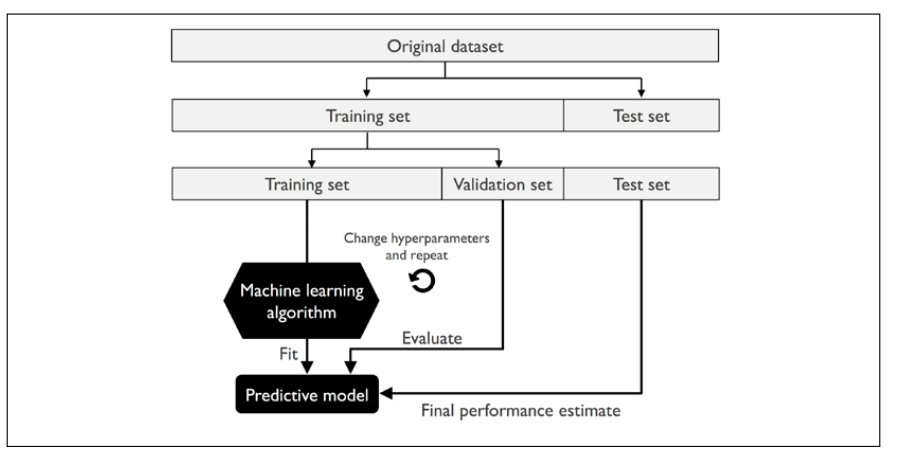

##K-fold cross-validation

In [8]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

kfold=StratifiedKFold(n_splits=10).split(X_train, y_train)
scores=[]
for k, (train, test) in enumerate(kfold):
  pipe_lr.fit(X_train[train], y_train[train])
  score = pipe_lr.score(X_train[test], y_train[test])
  scores.append(score)
  print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(y_train[train]), score))


Fold:  1, Class dist.: [256 153], Acc: 0.935
Fold:  2, Class dist.: [256 153], Acc: 0.935
Fold:  3, Class dist.: [256 153], Acc: 0.957
Fold:  4, Class dist.: [256 153], Acc: 0.957
Fold:  5, Class dist.: [256 153], Acc: 0.935
Fold:  6, Class dist.: [257 153], Acc: 0.956
Fold:  7, Class dist.: [257 153], Acc: 0.978
Fold:  8, Class dist.: [257 153], Acc: 0.933
Fold:  9, Class dist.: [257 153], Acc: 0.956
Fold: 10, Class dist.: [257 153], Acc: 0.956


In [9]:
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


CV accuracy: 0.950 +/- 0.014


In [12]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(estimator=pipe_lr,
                       X=X_train,
                       y=y_train,
                       cv=10,
                       n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
CV accuracy: 0.950 +/- 0.014


An extremely useful feature of the cross_val_score approach is that we can
distribute the evaluation of the different folds across multiple central processing
units (CPUs) on our machine. If we set the n_jobs parameter to 1, only one CPU
will be used to evaluate the performances, just like in our StratifiedKFold example
previously. However, by setting n_jobs=2, we could distribute the 10 rounds
of cross-validation to two CPUs (if available on our machine), and by setting
n_jobs=-1, we can use all available CPUs on our machine to do the computation
in parallel.
